In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(18249, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month

In [10]:
df=df.drop(['Date'],axis=1,)

In [11]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [199]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

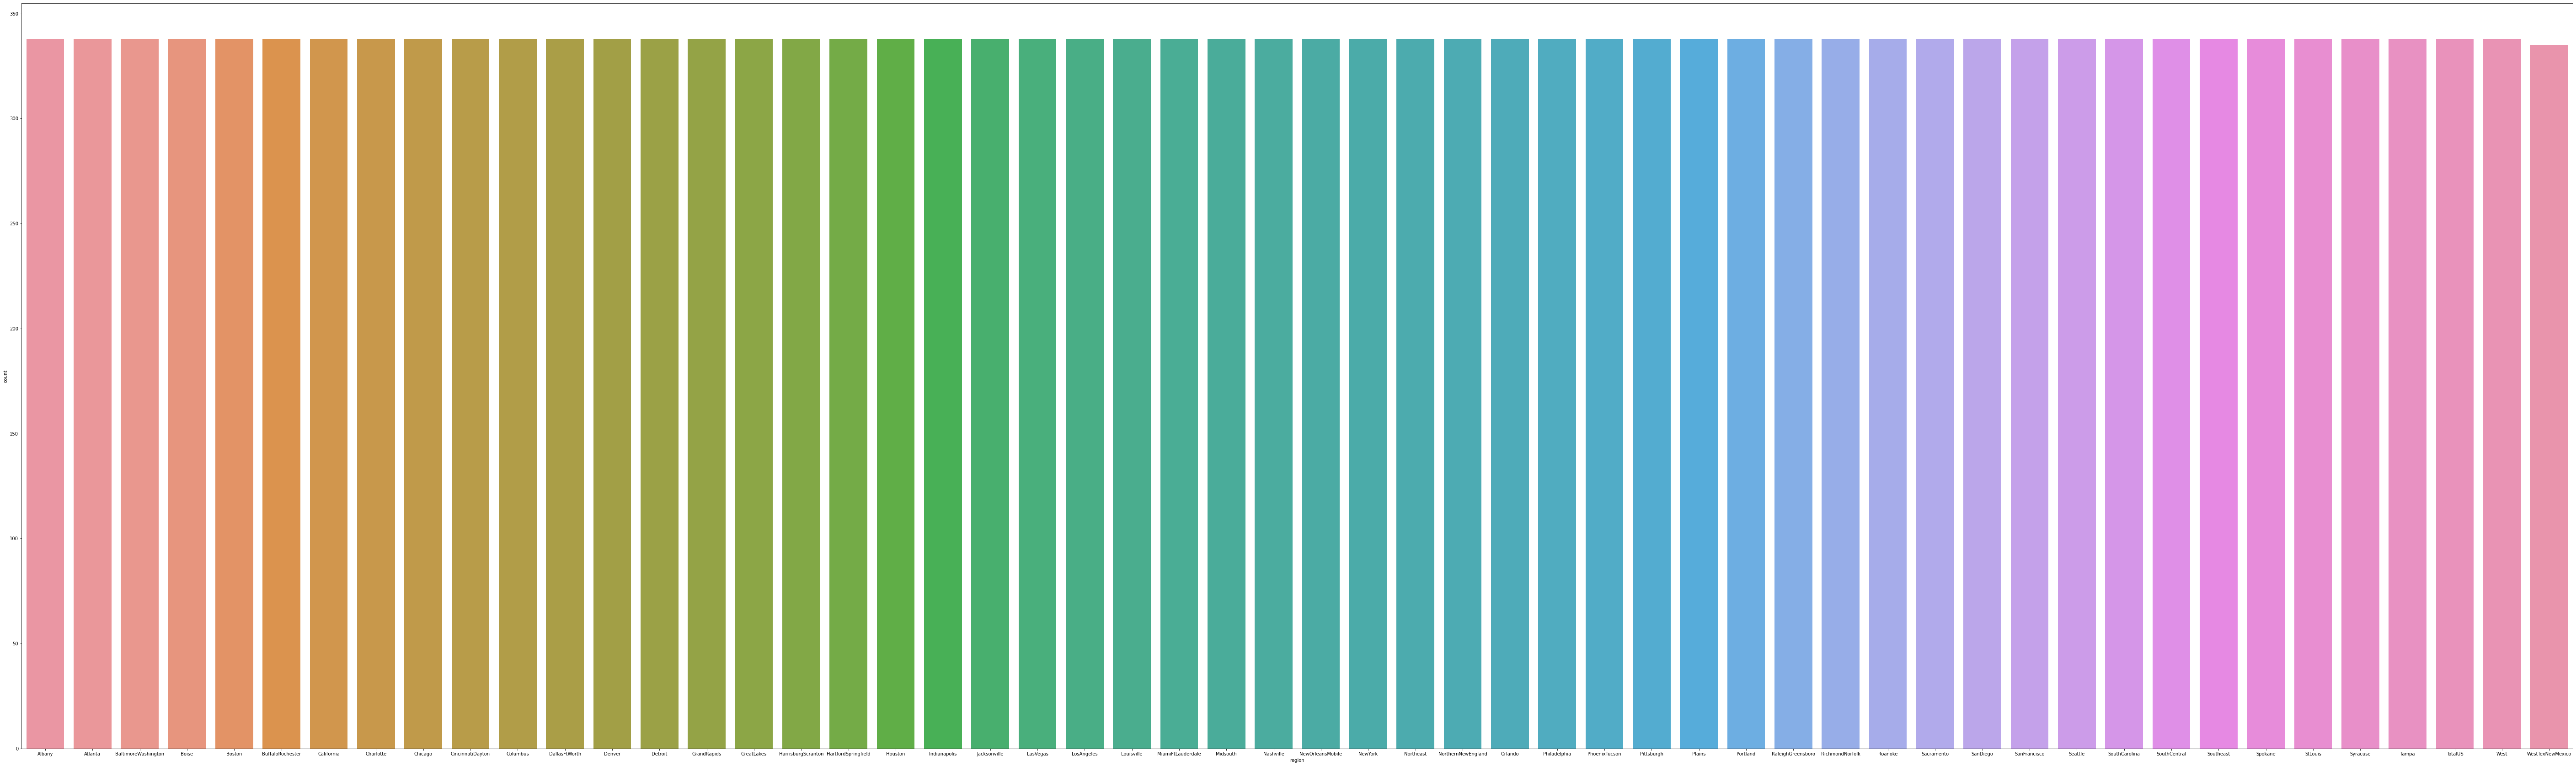

In [200]:
plt.subplots(figsize=(100,30))
sns.countplot(x='region',data=df)

In [201]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:>

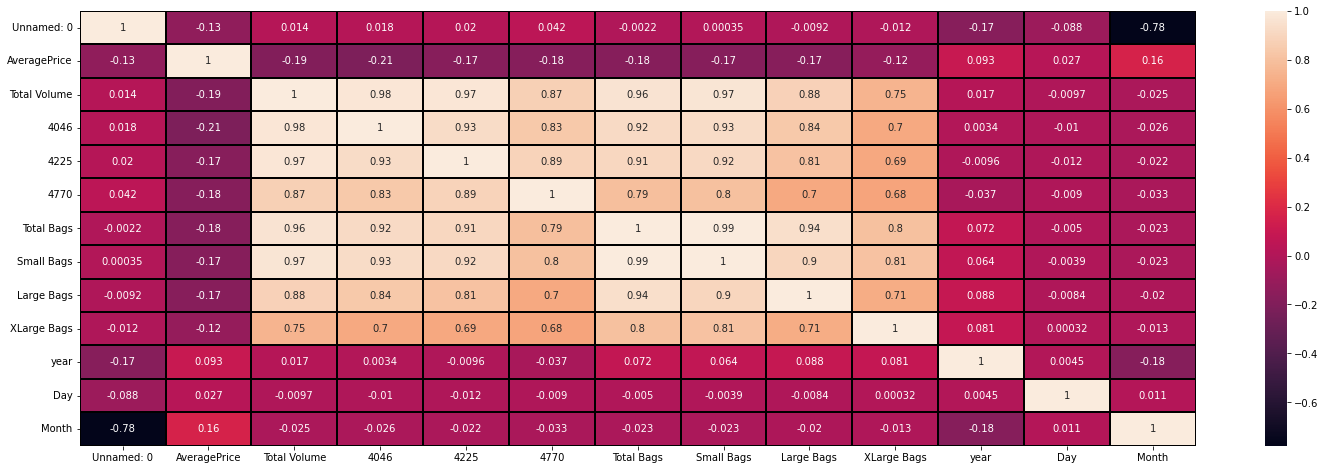

In [202]:
plt.subplots(figsize=(25,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.25, 
    linecolor='black')

<AxesSubplot:>

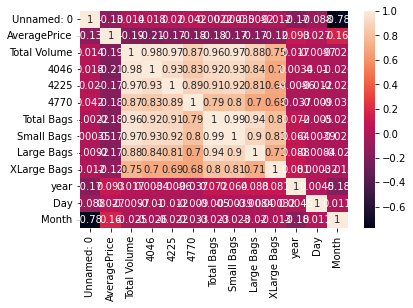

In [203]:
sns.heatmap(df.corr(),annot=True)

In [204]:
cat_data=df.select_dtypes(include=[np.object]).columns

In [205]:
cat_data

Index(['type', 'region'], dtype='object')

In [206]:
num_data=df.select_dtypes(include=[np.object]).columns

In [75]:
df_new=df.drop(columns=['Small Bags','Large Bags','XLarge Bags','region',"4046","4225","4770"])

In [207]:
df_new.head()

,AveragePrice,Total Volume,Total Bags,type,year
0,1.33,64236.62,8696.87,0,2015
1,1.35,54876.98,9505.56,0,2015
2,0.93,118220.22,8145.35,0,2015
3,1.08,78992.15,5811.16,0,2015
4,1.28,51039.60,6183.95,0,2015


<AxesSubplot:xlabel='type', ylabel='Total Volume'>

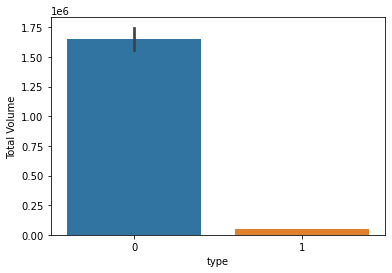

In [208]:
sns.barplot(data=df_new,x='type',y='Total Volume')

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

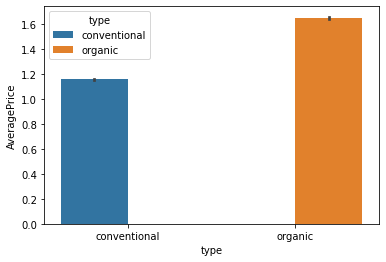

In [78]:
sns.barplot(data=df,x='type',y='AveragePrice',hue='type')

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

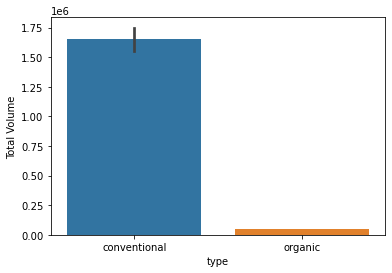

In [209]:
sns.barplot(data=df,x='type',y='Total Volume')

In [16]:
encoder = LabelEncoder()
df[['type','region']]=df[['type','region']].apply(encoder.fit_transform)

In [294]:
df

In [212]:
x=df.drop(['type'],axis=1)
y=df['type']

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)

In [214]:
from scipy.stats import zscore
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [215]:
df.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Day             0.011778
Month           0.107408
dtype: float64

In [246]:
x= df.drop('AveragePrice',axis =1)
y= df['AveragePrice']

In [247]:
scaler=StandardScaler()

In [248]:
x_scaled=scaler.fit_transform(x)

In [249]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=20)

In [250]:
from sklearn.ensemble import RandomForestRegressor

In [251]:
lm=LinearRegression()

In [252]:
lm.fit(x_train,y_train)

LinearRegression()

In [253]:
lm.score(x_train,y_train)

0.442092837095417

In [256]:
y_pred=lm.predict(x_test)
y_pred

array([1.48041938, 1.69709454, 1.47576564, ..., 1.10292551, 1.70612966,
       1.69400818])

In [257]:
rf=RandomForestRegressor()

In [259]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [260]:
y_pred=rf.predict(x_test)

In [261]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [262]:
svr.score(x_train,y_train)

0.640629203440689

In [263]:
y_pred=svr.predict(x_test)

In [264]:
params={'criterion':['mse'],
       'n_estimators':[100],
        'max_features':['auto'],
        'max_depth':[1,2,3,4,5,6,7,8],
        'min_samples_split':[1,2,3,4,5,6]
       }

In [265]:
Gscv=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [266]:
Gscv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100]})

In [172]:
Gscv.fit(x_train,y_train)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100]})

In [173]:
Gscv.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 100}

In [186]:
rd=RandomForestRegressor(criterion='mse',
 max_depth=8,
 max_features='auto',
 min_samples_split=6,
 n_estimators=100)

In [187]:
rd.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='mse', max_depth=8, max_features='auto',
                      min_samples_split=6)

In [188]:
rd.score(x_train,y_train)

0.81200547870592

Let us work on classification model

In [319]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [320]:
encoder = LabelEncoder()
df[['type','region']]=df[['type','region']].apply(encoder.fit_transform)

In [17]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,14,1


In [18]:
x=df.drop(['region'],axis=1)
y=df.region

In [19]:
from sklearn.feature_selection import SelectKBest

In [20]:
features=SelectKBest(k=10)
fea=features.fit(x,y)

In [21]:
fea.scores_

array([6.93838115e+01, 3.19035278e+02, 2.95483768e+02, 3.08834412e+02,
       2.08050643e+02, 2.95176645e+02, 2.98998145e+02, 2.54735012e+02,
       1.23297554e+02, 4.96122541e-04, 1.78708353e-05, 2.89689587e-06,
       1.31939631e-04])

In [22]:
x1=pd.DataFrame(fea.scores_)
x1

,0
0,69.383811
1,319.035278
2,295.483768
3,308.834412
4,208.050643
5,295.176645
6,298.998145
7,254.735012
8,123.297554
9,0.000496


In [23]:
x2=pd.DataFrame(x.columns)
x2

,0
0,AveragePrice
1,Total Volume
2,4046
3,4225
4,4770
5,Total Bags
6,Small Bags
7,Large Bags
8,XLarge Bags
9,type


In [24]:
pd.concat([x1,x2],axis=1)

,0,0
0,69.383811,AveragePrice
1,319.035278,Total Volume
2,295.483768,4046
3,308.834412,4225
4,208.050643,4770
5,295.176645,Total Bags
6,298.998145,Small Bags
7,254.735012,Large Bags
8,123.297554,XLarge Bags
9,0.000496,type


hence we could see that the top 8 features have high corr()

In [25]:
x=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [26]:
scaler=StandardScaler()
x_scaled_1=scaler.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled_1,y,test_size=0.30,random_state=100)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
pred=rf.score(x_train,y_train)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
knn.score(x_train,y_train)

0.6618130577736027

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [39]:
log.score(x_train,y_train)

0.2385313918897761

hence we have good score in randomForest Classifier ,lets chect its overfitted or not

In [40]:
parameter={'n_estimators':[100,120,145,177,180],
          'criterion':["gini","entropy"],
          'max_depth':range(2,10,2),
          'min_samples_leaf':range(2,10,2),
          'min_samples_split':range(2,10,2),
          'max_features':['auto','log2']}

In [41]:
Grid_s=GridSearchCV(rf,param_grid=parameter)

In [42]:
Grid_s.fit(x_train,y_train)

In [ ]:
Grid_s.best_params_

In [ ]:
rf=RandomForestClassifier(criterion='entropy',max_depth=12,min_samples_leaf=6,min_samples_split=6,n_estimators=100)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
rf.score(x_train,y_train)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
Final_DF=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=y_test,y=y_pred,hue=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(' Actual vs  Predicted')
plt.show()

In [ ]:
import pickle
filename='AvacadoRegion'
pickle.dump(rd,open(filename,'wb'))